<a href="https://colab.research.google.com/github/sungrae98/Machine-Learning/blob/main/01_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


ML_01. 데이터 탐색

In [ ]:
# 기초 통계 복습
# 왜도와 첨도

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

In [ ]:
np.random.normal(0,1,100000)

# random.normal : normal distribution(정규분포)
# >> 평균 0, 분산(표준편차) 1인 100000개 생성

array([-2.23111068, -0.27235389, -1.08131119, ...,  0.54519241,
       -1.94664373,  0.89740295])

In [ ]:
data = np.random.normal(0,1,100000)


In [ ]:
print('mean(평균): ', np.mean(data))
print('var(분산): ', np.var(data))
print('skew(왜도): ', skew(data))
print('kurtosis(첨도): ', kurtosis(data))

mean(평균):  0.0008504606602770656
var(분산):  0.9974960033490415
skew(왜도):  -0.0002639292163293343
kurtosis(첨도):  0.016557061940627893


In [ ]:
# 일반화 >> 신뢰할 수 있는 모델을 만들었다.(반복 검증해도 동일한 결과 기대)

In [ ]:
# 공분산, 상관계수
import seaborn as sns

iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
iris.shape
# 150개 데이터, 5개 속성(attributes)

(150, 5)

In [ ]:
iris.info()
# null 값 존재 확인, 각 변수의 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
# x(독립변수), y(종속변수, 결과변수) 분리
iris.iloc[:,:-1]

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [ ]:
# 상관계수

x.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

<Axes: xlabel='petal_length', ylabel='petal_width'>

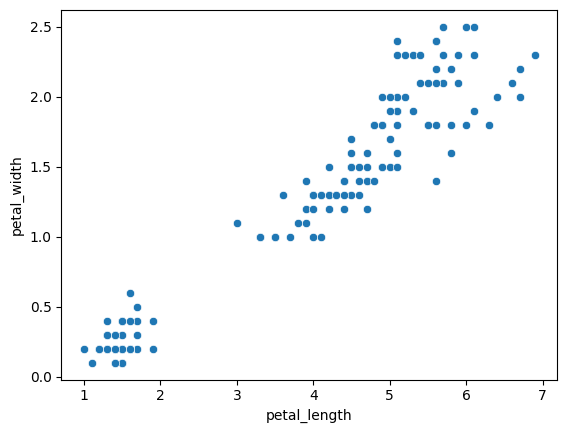

In [ ]:
# 산점도 그리기

sns.scatterplot(x = 'petal_length', y = 'petal_width', data = iris)

In [ ]:
#요약통계량

iris.describe(include = 'all')

sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN

In [ ]:
iris.corr(method = 'pearson')

<ipython-input-17-f46de9adcea3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method = 'pearson')


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

In [ ]:
iris.corr(method = 'spearman')
#스피어만 상관분석 : 서열(순서) 척도시 사용되는 상관분석 방법

<ipython-input-18-fd9f3554bfbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method = 'spearman')


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.166778      0.881898     0.834289
sepal_width      -0.166778     1.000000     -0.309635    -0.289032
petal_length      0.881898    -0.309635      1.000000     0.937667
petal_width       0.834289    -0.289032      0.937667     1.000000

In [ ]:
#중요 특성(petal width, petal length) 스피어만 상관분석

from scipy.stats.stats import spearmanr

spearmanr(iris.petal_length, iris.petal_width)
#
# pvalue는 무조건 틀릴 확률 (5%) >> 0.05(기준) 작음
# >> 통계적으로 유의하다
# p-value 란, 귀무가설(영가설)이 참이라고 할 때 반드시 기각역(유의수준 내)있는 극단적인 확률

<ipython-input-19-952b7105063f>:3: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr


SignificanceResult(statistic=0.9376668235763412, pvalue=8.156596854126675e-70)